# 1. Perkenalan

<b>Name: </b>Rohmad

<b>Type: </b>Graded Challenge 1

<b>Dataset: </b>This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defence, and Speed.

<b>Objective: </b>To find out the strongest and weakest Pokemon based on Total(HP+Attack+Defense+Special Attack+Sepcial Defense+Speed), Strongest Attack and Defense.

# 2. Import pustaka yang dibutuhkan

In [1]:
#import library
import pandas as pd
#mengecek versi library
print(pd.__version__)

1.2.4


# 3. Data Loading

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

<b>Loading data with pandas</b>

In [4]:
df = pd.read_csv('Pokemon.csv')

<b>Showing data top 5 <b/>

In [3]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<b>Showing data low 5</b>

In [5]:
df.tail(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


<b>Information data type</b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


<b>Showing data summery like max, min, mean etc. </b>

In [7]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<b>Showing pokemon type 1</b>

In [9]:
df["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

<b>Showing pokemon type 2</b>

In [10]:
df["Type 2"].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Ghost       14
Water       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

<b>Showing sum pokemon in codition type water and generation</b>

In [12]:
df.loc[df["Type 1"] == "Water", "Generation"].sum()

320

# 4. Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

<b>Rename columns in datashets</b>

In [15]:
df.rename(
    columns={
        '#': 'No.',
        'Name': 'Nama Pokemon',
        'Type 1': 'Tipe 1',
        'Type 2': 'Tipe 2',
        'Total': 'Total',
        'HP': 'Hit Point',
        'Attack': 'Serangan',
        'Defense': 'Pertahanan',
        'Sp. Atk': 'Serangan Spesial',
        'Sp. Def': 'Pertahanan Spesial',
        'Speed': 'Kecepatan',
        'Generation': 'Generasi',
        'Legendary': 'Legenda'
    }, inplace= True)

<b>Deleting column don't needed in case 'Lgenda' columns</b>

In [16]:
del df["Legenda"]

In [17]:
df.head()

,No.,Nama Pokemon,Tipe 1,Tipe 2,Total,Hit Point,Serangan,Pertahanan,Serangan Spesial,Pertahanan Spesial,Kecepatan,Generasi
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1


<b>Showing how much data isnull or missing values</b>

In [18]:
df.isnull().sum()

No.                     0
Nama Pokemon            0
Tipe 1                  0
Tipe 2                386
Total                   0
Hit Point               0
Serangan                0
Pertahanan              0
Serangan Spesial        0
Pertahanan Spesial      0
Kecepatan               0
Generasi                0
dtype: int64

<b>Replacing missing value with separator dash (-)</b>

In [19]:
df["Tipe 2"].fillna("-", inplace=True)
df.isnull().sum()

No.                   0
Nama Pokemon          0
Tipe 1                0
Tipe 2                0
Total                 0
Hit Point             0
Serangan              0
Pertahanan            0
Serangan Spesial      0
Pertahanan Spesial    0
Kecepatan             0
Generasi              0
dtype: int64

# 5. Explorasi Data

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

<b>Showing max values in total columns</b>

In [22]:
poke_max = df["Total"].max() 
poke_max

780

<b>Showing pokemon with max value 780<b/>

In [21]:
total_max = df[df['Total'] == 780] 
total_max

,No.,Nama Pokemon,Tipe 1,Tipe 2,Total,Hit Point,Serangan,Pertahanan,Serangan Spesial,Pertahanan Spesial,Kecepatan,Generasi
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1
164,150,MewtwoMega Mewtwo Y,Psychic,-,780,106,150,70,194,120,140,1
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3


<b>Showing min values in total columns</b>

In [23]:
poke_min = df["Total"].min() 
poke_min

180

<b>Showing pokemon with min value 180</b>

In [25]:
total_min = df[df['Total'] == 180] 
total_min

,No.,Nama Pokemon,Tipe 1,Tipe 2,Total,Hit Point,Serangan,Pertahanan,Serangan Spesial,Pertahanan Spesial,Kecepatan,Generasi
206,191,Sunkern,Grass,-,180,30,30,30,30,30,30,2


<b>Showing rate values in total columns, with purpose how much rate stronger other pokemon</b>

In [26]:
poke_rate = df["Total"].mean()
poke_rate

435.1025

<b>Showing pokemon with rate equal or greater than 430</b>

In [27]:
df[df['Total'] >= 435].sort_values(by='Total',
                                              ascending=False,
                                              inplace=False)

,No.,Nama Pokemon,Tipe 1,Tipe 2,Total,Hit Point,Serangan,Pertahanan,Serangan Spesial,Pertahanan Spesial,Kecepatan,Generasi
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3
164,150,MewtwoMega Mewtwo Y,Psychic,-,780,106,150,70,194,120,140,1
422,382,KyogrePrimal Kyogre,Water,-,770,100,150,90,180,160,90,3
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3
...,...,...,...,...,...,...,...,...,...,...,...,...
370,338,Solrock,Rock,Psychic,440,70,95,85,55,65,70,3
29,24,Arbok,Poison,-,438,60,85,69,65,79,80,1
215,200,Misdreavus,Ghost,-,435,60,60,60,85,85,85,2
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1


<b>Showing pokemon with rate less than 430</b>

In [28]:
df[df['Total'] < 435].sort_values(by='Total',
                                              ascending=True,
                                              inplace=False)

,No.,Nama Pokemon,Tipe 1,Tipe 2,Total,Hit Point,Serangan,Pertahanan,Serangan Spesial,Pertahanan Spesial,Kecepatan,Generasi
206,191,Sunkern,Grass,-,180,30,30,30,30,30,30,2
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3
446,401,Kricketot,Bug,-,194,37,25,41,25,41,25,4
13,10,Caterpie,Bug,-,195,45,30,35,20,20,45,1
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
302,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3
227,211,Qwilfish,Water,Poison,430,65,95,75,55,55,85,2
331,305,Lairon,Steel,Rock,430,60,90,140,50,50,40,3
233,215,Sneasel,Dark,Ice,430,55,95,55,35,75,115,2


<b>Showing max values in Serangan columns</b>

In [29]:
poke_str_max = df["Serangan"].max() 
poke_str_max

190

<b>Showing pokemon with strenght 190</b>

In [31]:
df[df['Serangan'] == 190]

,No.,Nama Pokemon,Tipe 1,Tipe 2,Total,Hit Point,Serangan,Pertahanan,Serangan Spesial,Pertahanan Spesial,Kecepatan,Generasi
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1


<b>Showing max values in Pertahanan columns</b>

In [32]:
poke_def_max = df["Pertahanan"].max() 
poke_def_max

230

<b>Showing pokemon with defense 230</b>

In [33]:
df[df['Pertahanan'] == 230]

,No.,Nama Pokemon,Tipe 1,Tipe 2,Total,Hit Point,Serangan,Pertahanan,Serangan Spesial,Pertahanan Spesial,Kecepatan,Generasi
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2
333,306,AggronMega Aggron,Steel,-,630,70,140,230,60,80,50,3


<b>Showing pokemon with type 1 'Water' and type 2 'Flying' and total equal or greater than mean 435</b>

In [34]:
df[(df["Tipe 1"] == "Water") & (df["Tipe 2"] == "Flying") &
   (df["Total"] >= 435)]

,No.,Nama Pokemon,Tipe 1,Tipe 2,Total,Hit Point,Serangan,Pertahanan,Serangan Spesial,Pertahanan Spesial,Kecepatan,Generasi
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1
244,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2
642,581,Swanna,Water,Flying,473,75,87,63,87,63,98,5


<b>Showing pokemon with type 1 'Water' and type 2 'Flying' and total equal or less than mean 435</b>

In [36]:
df[(df["Tipe 1"] == "Water") & (df["Tipe 2"] == "Flying") &
   (df["Total"] <= 435)]

,No.,Nama Pokemon,Tipe 1,Tipe 2,Total,Hit Point,Serangan,Pertahanan,Serangan Spesial,Pertahanan Spesial,Kecepatan,Generasi
301,278,Wingull,Water,Flying,270,40,30,30,55,30,85,3
302,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3
508,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4
641,580,Ducklett,Water,Flying,305,62,44,50,44,50,55,5


<strong>GROUPING AND AGREGATING</strong>

<b>Pokemon grouping by type 1, type 2, generation and count type each generation</b>

In [37]:
df[(df["Total"] >= 435) & (df["Hit Point"] >= 100)].groupby(
    ["Tipe 1", "Tipe 2", "Generasi"])["Generasi"].count()

Tipe 1  Tipe 2    Generasi
Dark    Flying    4           1
                  5           1
                  6           1
Dragon  Electric  5           1
        Fire      5           1
                             ..
Water   Ground    3           3
                  4           1
                  5           1
        Ice       1           1
        Rock      3           1
Name: Generasi, Length: 70, dtype: int64

<b>Pokemon grouping by type 1, type 2, pokemon name and generation name</b>

In [43]:
df[(df["Tipe 1"] == "Water") & (df["Tipe 2"] == "Ground") &
   (df["Hit Point"] >= 100) & (df["Generasi"] == 3)].groupby(
       ["Tipe 1", "Tipe 2", "Nama Pokemon"])["Generasi"].count()

Tipe 1  Tipe 2  Nama Pokemon         
Water   Ground  Swampert                 1
                SwampertMega Swampert    1
                Whiscash                 1
Name: Generasi, dtype: int64

<b>Pokemon grouping by attack, defense, HP and speed</b>

In [42]:
df[(df["Serangan"] >= 100) & (df["Pertahanan"] >= 100) &
   (df["Hit Point"] >= 100) & (df["Kecepatan"] >= 100)].groupby(
       ["Serangan", "Pertahanan", "Hit Point","Kecepatan"])["Nama Pokemon"].count()

Serangan  Pertahanan  Hit Point  Kecepatan
100       100         100        100          6
120       120         120        120          1
125       100         105        100          1
160       100         150        100          1
          110         110        100          1
180       100         105        115          1
190       100         106        130          1
Name: Nama Pokemon, dtype: int64

<strong>SIMPLE VISUALIZATION WITH PANDAS</strong>

<b>Visualiztion strongest pokemon with Bar chart, in case with total strenght above 690</b>

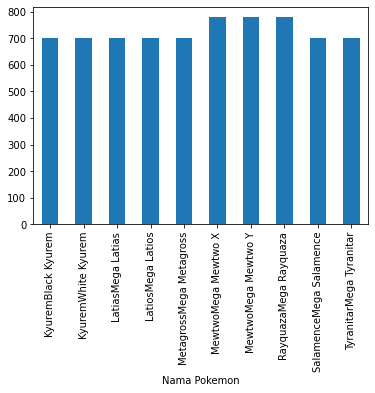

In [44]:
total_max_vis = df[df['Total'] > 690].groupby('Nama Pokemon')["Total"].sum().tail(10).plot(kind='bar')

<b>Visualiztion strongest pokemon with Bar chart, in case with total strenght below 250</b>

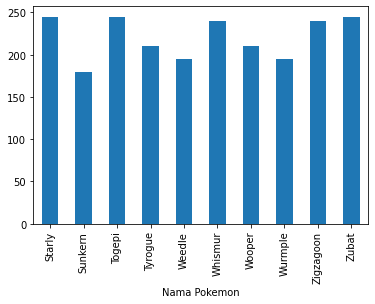

In [45]:
total_min_vis = df[df['Total'] < 250].groupby('Nama Pokemon')["Total"].sum().tail(10).plot(kind='bar')

<b>Visualiztion attack pokemon with Bar chart, in case with attack above 150 </b>

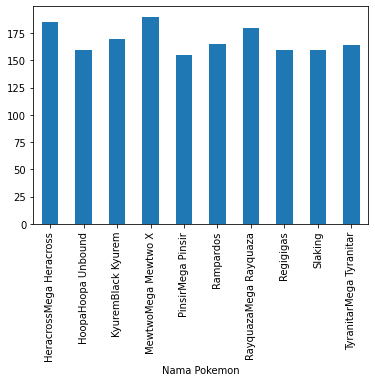

In [47]:
attack_vis = df[df['Serangan'] > 150].groupby('Nama Pokemon')["Serangan"].sum().tail(10).plot(kind='bar')

<b>Visualiztion defense pokemon with Bar chart, in case with defense above 150</b>

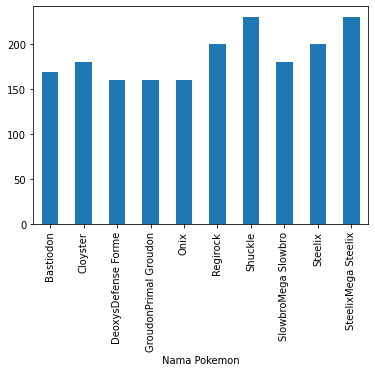

In [48]:
defense_vis = df[df['Pertahanan'] > 150].groupby('Nama Pokemon')["Pertahanan"].sum().tail(10).plot(kind='bar')

# 6. Pengambilan Kesimpulan

Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

Dari hasil explorasi dan alanisis data yang telah kami lakukan terdapat beberapa kesimpulan sebagai berikut:
1. Berdasarkan jumlah pokemon yang ada, kami mendapatkan 3 pokemon terkuat dengan Kekutan <b>780</b>, yaitu:<br/>
    a. MewtwoMega Mewtwo X <br/>
    b. MewtwoMega Mewtwo Y <br/>
    c. RayquazaMega Rayquaza<br/>
2. Berdasarkan jumlah pokemon yang ada, hanya ada 1 pokemon dengan kekuatan terlemah, dengan kekuatan <b>180</b>, yaitu:<br/>
    a. Sunkern</br>
3. Berdasarkan jumlah pokemon yang ada, kami mendapatkan 1 pokemon dengan Serangan terkuat yaitu <b>MewtwoMega Mewtwo X</b> dengan nilai sebesar <b>190</b> dan mendapatkan 3 pokemon dengan pertahanan terbaik, dengan nilai <b>230</b> yaitu:<br/>
    a. SteelixMega Steelix <br/>
    b. Shuckle <br/>
    c. AggronMega Aggron <br/>